# Flight Fare Prediction (Regression Problem)

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Set float format to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

In [3]:
df = pd.read_excel('Data_Train.xlsx')
df.head(3)

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882

### 1) Data Exportation and Cleaning

In [4]:
df.describe(include = 'all').replace(np.nan , '-')

Airline Date_of_Journey Source Destination            Route  \
count         10683           10683  10683       10683            10682   
unique           12              44      5           6              128   
top     Jet Airways      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
freq           3849             504   4537        4537             2376   
mean              -               -      -           -                -   
std               -               -      -           -                -   
min               -               -      -           -                -   
25%               -               -      -           -                -   
50%               -               -      -           -                -   
75%               -               -      -           -                -   
max               -               -      -           -                -   

       Dep_Time Arrival_Time Duration Total_Stops Additional_Info    Price  
count     10683        10683    10683       10682           10683 10683.00  
unique      222         1343      368           5              10        -  
top       18:55        19:00   2h 50m      1 stop         No info        -  
freq        233          423      550        5625            8345        -  
mean          -            -        -           -               -  9087.06  
std           -            -        -           -               -  4611.36  
min           -            -        -           -               -  1759.00  
25%           -            -        -           -               -  5277.00  
50%           -            -        -           -               -  8372.00  
75%           -            -        -           -               - 12373.00  
max           -            -        -           -               - 79512.00

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.duplicated().sum()

220

#### ⭕️ Remove Duplicate / null + Reset Index

In [8]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True)

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10457     Air Asia       9/04/2019   Kolkata    Banglore   
10458    Air India      27/04/2019   Kolkata    Banglore   
10459  Jet Airways      27/04/2019  Banglore       Delhi   
10460      Vistara      01/03/2019  Banglore   New Delhi   
10461    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10457              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10458              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10459              BLR → DEL    08:20         11:20       3h    non-stop   
10460              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10461  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10457         No info   4107  
10458         No info   4145  
10459         No info   7229  
10460         No info  12648  
10461         No info  11753  

[10462 rows x 11 columns]

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


In [12]:
df.head(1)

Airline Date_of_Journey    Source Destination      Route Dep_Time  \
0  IndiGo      24/03/2019  Banglore   New Delhi  BLR → DEL    22:20   

   Arrival_Time Duration Total_Stops Additional_Info  Price  
0  01:10 22 Mar   2h 50m    non-stop         No info   3897

#### ⭕️ Data Cleaning

- Date_of_Journey : Case to Datetime
- Route : split and calcuate the points (Total_Stops)
- Dep_Time & Arrival_Time & Duration : case to Travel Duration

In [13]:
# Columns lowe case
df.columns = df.columns.str.lower()
df.head(2)

airline date_of_journey    source destination                  route  \
0     IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1  Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  dep_time  arrival_time duration total_stops additional_info  price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662

In [14]:
# airline
df.airline.value_counts().sort_index().reset_index()

airline  count
0                            Air Asia    319
1                           Air India   1694
2                               GoAir    194
3                              IndiGo   2043
4                         Jet Airways   3700
5                Jet Airways Business      6
6                   Multiple carriers   1196
7   Multiple carriers Premium economy     13
8                            SpiceJet    815
9                              Trujet      1
10                            Vistara    478
11            Vistara Premium economy      3

In [15]:
sorted(df.airline.unique().tolist())

['Air Asia',
 'Air India',
 'GoAir',
 'IndiGo',
 'Jet Airways',
 'Jet Airways Business',
 'Multiple carriers',
 'Multiple carriers Premium economy',
 'SpiceJet',
 'Trujet',
 'Vistara',
 'Vistara Premium economy']

In [16]:
df[df.airline == 'Jet Airways Business']

airline date_of_journey    source destination  \
657    Jet Airways Business      01/03/2019  Banglore   New Delhi   
2924   Jet Airways Business      01/03/2019  Banglore   New Delhi   
5372   Jet Airways Business      01/03/2019  Banglore   New Delhi   
7351   Jet Airways Business       3/03/2019     Delhi      Cochin   
9715   Jet Airways Business       6/03/2019     Delhi      Cochin   
10364  Jet Airways Business      01/03/2019  Banglore   New Delhi   

                       route dep_time  arrival_time duration total_stops  \
657          BLR → BOM → DEL    05:45         10:45       5h      1 stop   
2924         BLR → BOM → DEL    05:45         11:25   5h 40m      1 stop   
5372         BLR → BOM → DEL    05:45         12:25   6h 40m      1 stop   
7351   DEL → ATQ → BOM → COK    20:05  04:25 04 Mar   8h 20m     2 stops   
9715   DEL → ATQ → BOM → COK    20:05  04:25 07 Mar   8h 20m     2 stops   
10364        BLR → MAA → DEL    09:45         14:25   4h 40m      1 stop   

      additional_info  price  
657           No info  52229  
2924   Business class  79512  
5372   Business class  62427  
7351          No info  46490  
9715          No info  52285  
10364  Business class  57209

In [17]:
df[df.airline == 'Jet Airways']

airline date_of_journey    source destination  \
2      Jet Airways       9/06/2019     Delhi      Cochin   
6      Jet Airways      12/03/2019  Banglore   New Delhi   
7      Jet Airways      01/03/2019  Banglore   New Delhi   
8      Jet Airways      12/03/2019  Banglore   New Delhi   
13     Jet Airways       9/05/2019   Kolkata    Banglore   
...            ...             ...       ...         ...   
10666  Jet Airways      12/06/2019     Delhi      Cochin   
10667  Jet Airways      12/03/2019  Banglore   New Delhi   
10668  Jet Airways       9/05/2019     Delhi      Cochin   
10674  Jet Airways      12/03/2019  Banglore   New Delhi   
10680  Jet Airways      27/04/2019  Banglore       Delhi   

                       route dep_time  arrival_time duration total_stops  \
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
6            BLR → BOM → DEL    18:55  10:25 13 Mar  15h 30m      1 stop   
7            BLR → BOM → DEL    08:00  05:05 02 Mar   21h 5m      1 stop   
8            BLR → BOM → DEL    08:55  10:25 13 Mar  25h 30m      1 stop   
13           CCU → BOM → BLR    21:10  09:20 10 May  12h 10m      1 stop   
...                      ...      ...           ...      ...         ...   
10666        DEL → BOM → COK    18:15  19:00 13 Jun  24h 45m      1 stop   
10667        BLR → BOM → DEL    22:55  20:20 13 Mar  21h 25m      1 stop   
10668  DEL → JDH → BOM → COK    11:40         19:00   7h 20m     2 stops   
10674        BLR → BOM → DEL    20:35  21:20 13 Mar  24h 45m      1 stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   

                   additional_info  price  
2                          No info  13882  
6      In-flight meal not included  11087  
7                          No info  22270  
8      In-flight meal not included  11087  
13     In-flight meal not included   9663  
...                            ...    ...  
10666  In-flight meal not included  10262  
10667  In-flight meal not included  11087  
10668                      No info  21219  
10674  In-flight meal not included  11087  
10680                      No info   7229  

[3700 rows x 11 columns]

## 2) Feature Engineering

#### ✔️ date_of_journey

In [18]:
# date_of_journey
df.date_of_journey.info()

<class 'pandas.core.series.Series'>
Index: 10462 entries, 0 to 10682
Series name: date_of_journey
Non-Null Count  Dtype 
--------------  ----- 
10462 non-null  object
dtypes: object(1)
memory usage: 163.5+ KB


In [19]:
# Casting
df.date_of_journey = pd.to_datetime(df.date_of_journey , format="%d/%m/%Y",errors='coerce')

In [20]:
df['journey_year'] = df.date_of_journey.dt.year
df['journey_month'] = df.date_of_journey.dt.month
df['journey_day'] = df.date_of_journey.dt.day
df['journey_day_name'] = df.date_of_journey.dt.day_name()

In [21]:
JDN_Map = {'Sunday' : '2_Sunday', 'Wednesday' : '5_Wednesday', 'Friday' : '7_Friday', 'Monday' : '3_Monday', 'Tuesday' : '4_Tuesday', 'Saturday' : '1_Saturday','Thursday' : '6_Thursday'}
df['journey_day_name'] = df['journey_day_name'].map(JDN_Map)

In [22]:
sorted(df['journey_day_name'].unique().tolist())

['1_Saturday',
 '2_Sunday',
 '3_Monday',
 '4_Tuesday',
 '5_Wednesday',
 '6_Thursday',
 '7_Friday']

In [23]:
for i in ['journey_year','journey_month','journey_day','journey_day_name']:
    display(df[i].value_counts().sort_index().reset_index())
    print('')

journey_year  count
0          2019  10462

journey_month  count
0              3   2678
1              4   1078
2              5   3395
3              6   3311

journey_day  count
0            1   1058
1            3    835
2            6   1268
3            9   1375
4           12    946
5           15    967
6           18    814
7           21   1085
8           24   1022
9           27   1092

journey_day_name  count
0       1_Saturday   1623
1         2_Sunday   1449
2         3_Monday   1807
3        4_Tuesday    853
4      5_Wednesday   2048
5       6_Thursday   1774
6         7_Friday    908

In [24]:
df.drop('journey_year' , axis=1 , inplace=True)

#### ✔️ source

In [25]:
# source
df.source.value_counts()

source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

#### ✔️ destination

In [26]:
# destination
df.destination.value_counts()

destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

#### ✔️ route

In [27]:
# route
df.route.value_counts().sort_values(ascending = False)

route
DEL → BOM → COK                      2376
BLR → DEL                            1536
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BLR → HBX → BOM → NAG → DEL             1
BLR → BOM → IXC → DEL                   1
BLR → CCU → BBI → HYD → VGA → DEL       1
BOM → RPR → VTZ → HYD                   1
BOM → BBI → HYD                         1
Name: count, Length: 128, dtype: int64

#### ✔️ dep_time

In [28]:
# dep_time
df.head(1)

airline date_of_journey    source destination      route dep_time  \
0  IndiGo      2019-03-24  Banglore   New Delhi  BLR → DEL    22:20   

   arrival_time duration total_stops additional_info  price  journey_month  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897              3   

   journey_day journey_day_name  
0           24         2_Sunday

In [29]:
df['dep_hour'] = df.dep_time.apply(lambda x : int(x.split(':')[0]))

In [30]:
def classify_hour(hour):
    if int(hour) < 6:
        return 'Early Morning'
    elif int(hour) < 12:
        return 'Morning'
    elif int(hour) < 18:
        return 'Afternoon'
    else:
        return 'Evening'
df['dep_range'] = df.dep_hour.apply(classify_hour)

DurMapp = {'Evening' : '4_Evening' , 'Early Morning' : '1_Early Morning' , 'Morning' : '2_Morning' , 'Afternoon' : '3_Afternoon'}
df['dep_range'] = df['dep_range'].map(DurMapp)

In [31]:
df.head(1)

airline date_of_journey    source destination      route dep_time  \
0  IndiGo      2019-03-24  Banglore   New Delhi  BLR → DEL    22:20   

   arrival_time duration total_stops additional_info  price  journey_month  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897              3   

   journey_day journey_day_name  dep_hour  dep_range  
0           24         2_Sunday        22  4_Evening

#### ✔️ arrival_time

In [32]:
df.drop('arrival_time',axis=1 , inplace=True)
df.head(1)

airline date_of_journey    source destination      route dep_time duration  \
0  IndiGo      2019-03-24  Banglore   New Delhi  BLR → DEL    22:20   2h 50m   

  total_stops additional_info  price  journey_month  journey_day  \
0    non-stop         No info   3897              3           24   

  journey_day_name  dep_hour  dep_range  
0         2_Sunday        22  4_Evening

#### ✔️ duration

In [33]:
df.duration.unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [34]:
x = '29h 30m'
x.split(' ')[0][:-1]

'29'

In [35]:
def Dur (x):
    x = x.split()
    if len(x) == 2:
        return ( int(x[0][:-1]) * 60 ) + ( int(x[0][:-1]) )
    else:
        return ( int(x[0][:-1]) )
df['duration'] = df.duration.apply(Dur)
df.head(10)

airline date_of_journey    source destination  \
0             IndiGo      2019-03-24  Banglore   New Delhi   
1          Air India      2019-05-01   Kolkata    Banglore   
2        Jet Airways      2019-06-09     Delhi      Cochin   
3             IndiGo      2019-05-12   Kolkata    Banglore   
4             IndiGo      2019-03-01  Banglore   New Delhi   
5           SpiceJet      2019-06-24   Kolkata    Banglore   
6        Jet Airways      2019-03-12  Banglore   New Delhi   
7        Jet Airways      2019-03-01  Banglore   New Delhi   
8        Jet Airways      2019-03-12  Banglore   New Delhi   
9  Multiple carriers      2019-05-27     Delhi      Cochin   

                   route dep_time  duration total_stops  \
0              BLR → DEL    22:20       122    non-stop   
1  CCU → IXR → BBI → BLR    05:50       427     2 stops   
2  DEL → LKO → BOM → COK    09:25        19     2 stops   
3        CCU → NAG → BLR    18:05       305      1 stop   
4        BLR → NAG → DEL    16:50       244      1 stop   
5              CCU → BLR    09:00       122    non-stop   
6        BLR → BOM → DEL    18:55       915      1 stop   
7        BLR → BOM → DEL    08:00      1281      1 stop   
8        BLR → BOM → DEL    08:55      1525      1 stop   
9        DEL → BOM → COK    11:25       427      1 stop   

               additional_info  price  journey_month  journey_day  \
0                      No info   3897              3           24   
1                      No info   7662              5            1   
2                      No info  13882              6            9   
3                      No info   6218              5           12   
4                      No info  13302              3            1   
5                      No info   3873              6           24   
6  In-flight meal not included  11087              3           12   
7                      No info  22270              3            1   
8  In-flight meal not included  11087              3           12   
9                      No info   8625              5           27   

  journey_day_name  dep_hour        dep_range  
0         2_Sunday        22        4_Evening  
1      5_Wednesday         5  1_Early Morning  
2         2_Sunday         9        2_Morning  
3         2_Sunday        18        4_Evening  
4         7_Friday        16      3_Afternoon  
5         3_Monday         9        2_Morning  
6        4_Tuesday        18        4_Evening  
7         7_Friday         8        2_Morning  
8        4_Tuesday         8        2_Morning  
9         3_Monday        11        2_Morning

In [36]:
df.dep_range.unique()

array(['4_Evening', '1_Early Morning', '2_Morning', '3_Afternoon'],
      dtype=object)

#### ✔️ total_stops

In [37]:
# total_stops
df.total_stops.value_counts()

total_stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [38]:
df.total_stops.unique().tolist()

['non-stop', '2 stops', '1 stop', '3 stops', '4 stops']

In [39]:
Stop_Mapp = {"non-stop" : 0 , "1 stop" : 1 , "2 stops" : 2 , "3 stops" : 3 , "4 stops" : 4}
df['total_stops'] = df.total_stops.map(Stop_Mapp)
df.head(5)

airline date_of_journey    source destination                  route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   

  dep_time  duration  total_stops additional_info  price  journey_month  \
0    22:20       122            0         No info   3897              3   
1    05:50       427            2         No info   7662              5   
2    09:25        19            2         No info  13882              6   
3    18:05       305            1         No info   6218              5   
4    16:50       244            1         No info  13302              3   

   journey_day journey_day_name  dep_hour        dep_range  
0           24         2_Sunday        22        4_Evening  
1            1      5_Wednesday         5  1_Early Morning  
2            9         2_Sunday         9        2_Morning  
3           12         2_Sunday        18        4_Evening  
4            1         7_Friday        16      3_Afternoon

#### ✔️ additional_info

In [40]:
df.additional_info.value_counts()

additional_info
No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [41]:
df.drop('additional_info' , axis=1 , inplace=True)
df.drop('route' , axis=1 , inplace=True)
df.drop('dep_time' , axis=1 , inplace=True)

In [42]:
df.head(1)

airline date_of_journey    source destination  duration  total_stops  price  \
0  IndiGo      2019-03-24  Banglore   New Delhi       122            0   3897   

   journey_month  journey_day journey_day_name  dep_hour  dep_range  
0              3           24         2_Sunday        22  4_Evening

## 3) Univaria Analysis

In [43]:
cat = ['airline', 'source', 'destination', 'journey_day_name', 'dep_range','journey_month','journey_day','dep_hour','total_stops']
num = ['duration','price']

In [44]:
def BarPlot (data  , x , y):
    # Define a color palette with two colors
    color_palette = ['#1f77b4', '#ff7f0e']  # Example colors: blue and orange
    
    # Plot using Matplotlib
    fig, ax = plt.subplots(figsize=(10, 7))  # Set figure size
    
    # Create bar plot
    ax.bar(data[x], data[y], color='skyblue' )
    
    # Add text labels (Text_Auto equivalent)
    for index, value in enumerate(data[y]):
        ax.text(index, value, str(value), ha='center', va='bottom', fontsize=10)
    
    # Set titles and labels
    ax.set_title(f'Count of Rate {x}', fontsize=16)
    ax.set_xlabel(f'{x}', fontsize=12)
    ax.set_ylabel(f'{y}', fontsize=12)
    
    # Adjust layout and show plot
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

#### ✔️ Count of trips per Categoricals

In [45]:
for i in cat:
    msk = df[i].value_counts().sort_index().reset_index()
    px.bar(msk , x= i , y = 'count' , color = i , text_auto=True , width=800 , height=600 , template = 'plotly_dark'
           , color_discrete_sequence =px.colors.qualitative.D3_r , title=f'Count of {i}').show()
    print('')

## 4) Bivaria Analysis

#### ✔️ Frequency per Numircals

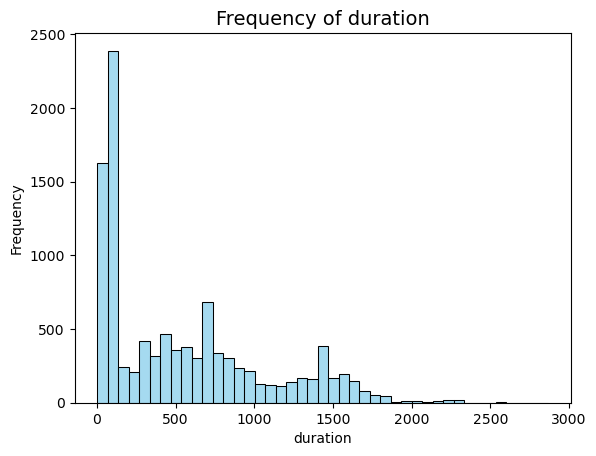

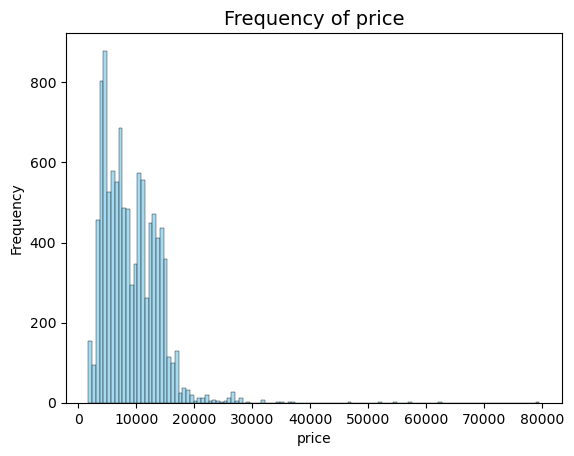

In [46]:
for i in num:
    sns.histplot(df , x=df[i] , color='skyblue', edgecolor='black')
    plt.title(f'Frequency of {i}', fontsize=14)
    plt.ylabel('Frequency')
    plt.show()

#### ✔️ Frequency per Categorical

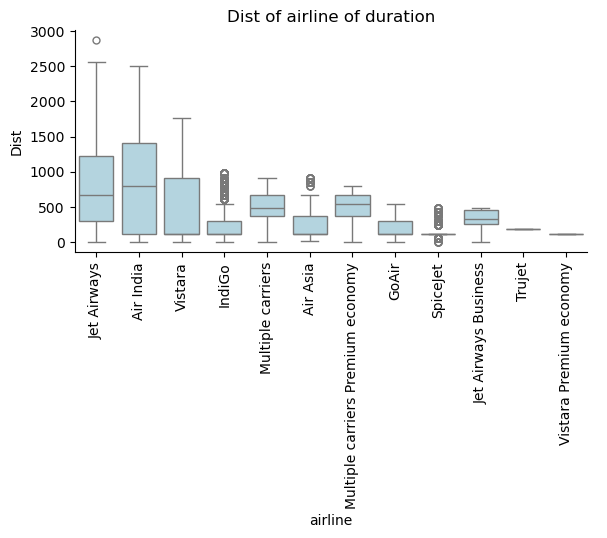

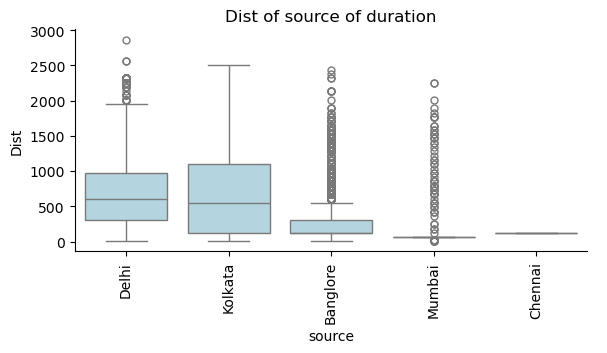

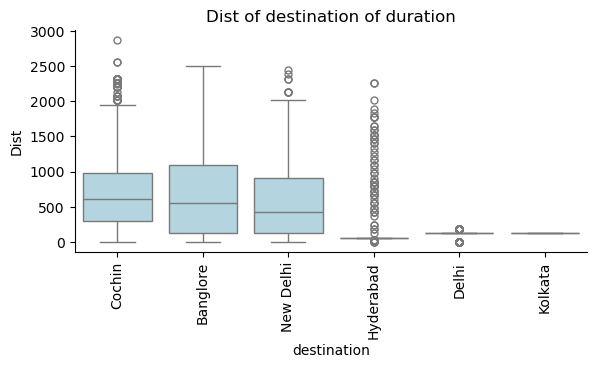

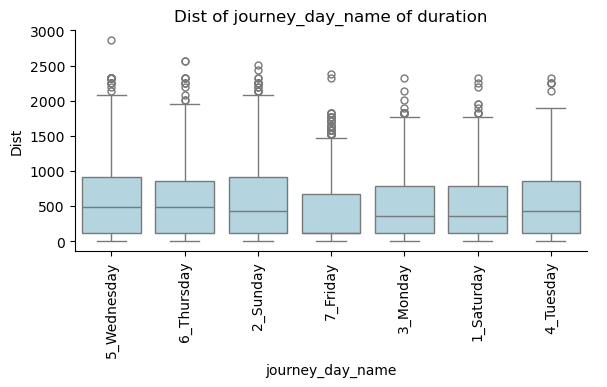

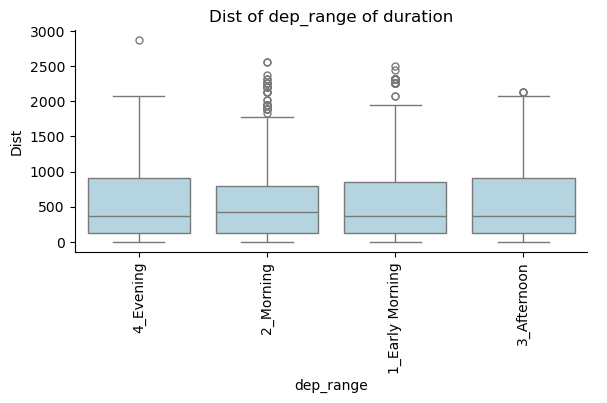

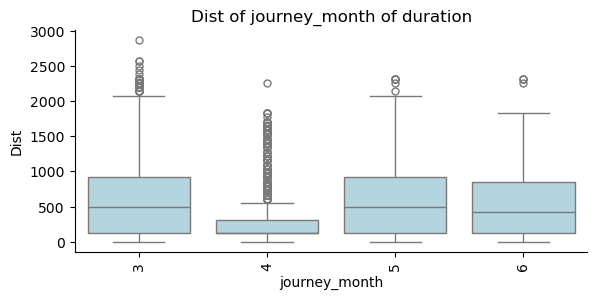

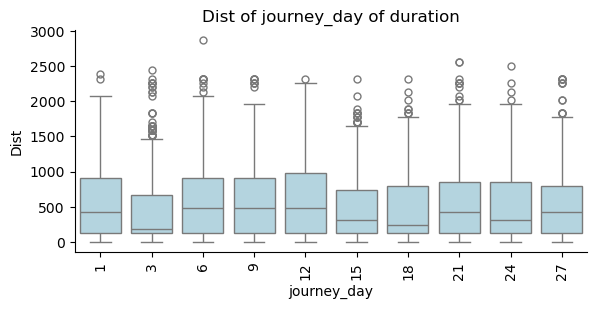

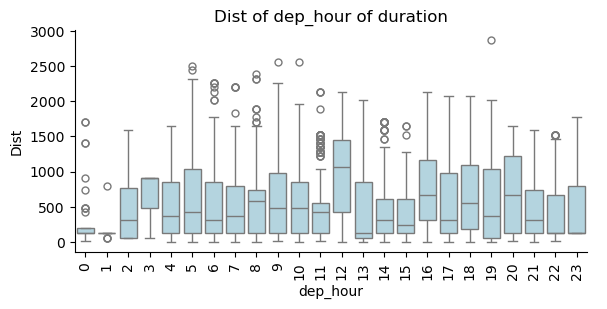

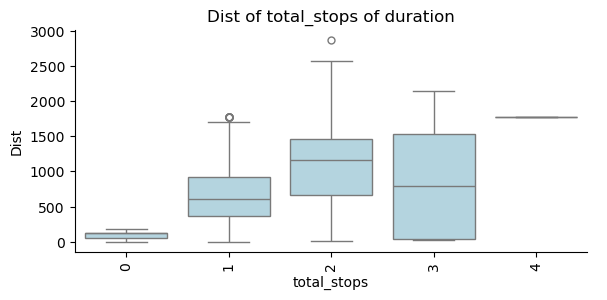

In [47]:
# Num Boxplot
for x in cat:
    sns.catplot(y = 'duration', x = x, data = df.sort_values('duration', ascending = False), kind='box', height = 3, aspect = 2, orient='v' , color = 'lightblue')
    plt.title(f'Dist of {x} of duration', fontsize=12)
    plt.xlabel(x)
    plt.ylabel('Dist')
    plt.xticks(rotation=90)
    plt.show()

#### ✔️ Distribution of Numircals

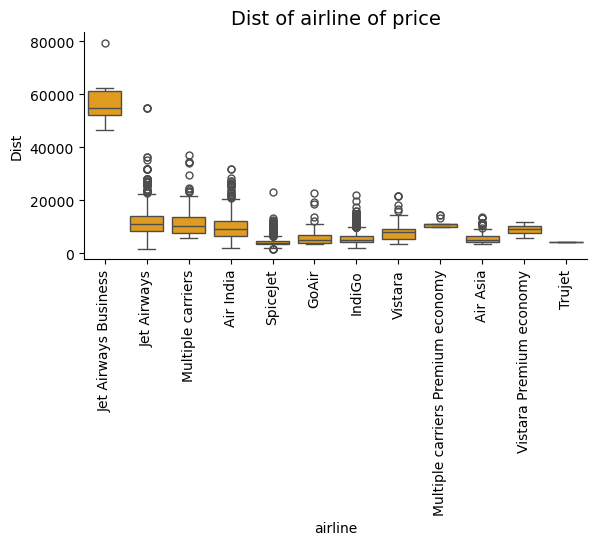

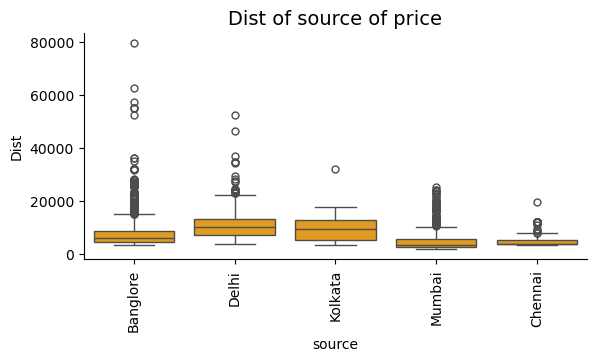

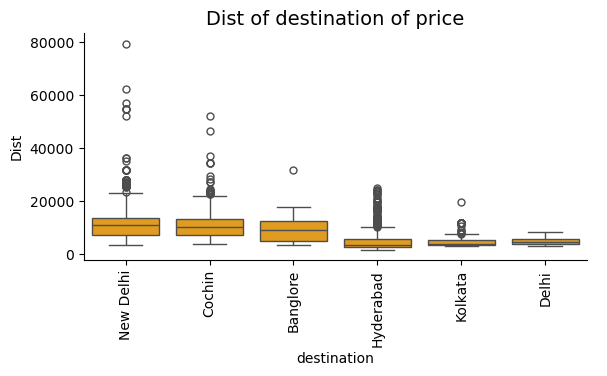

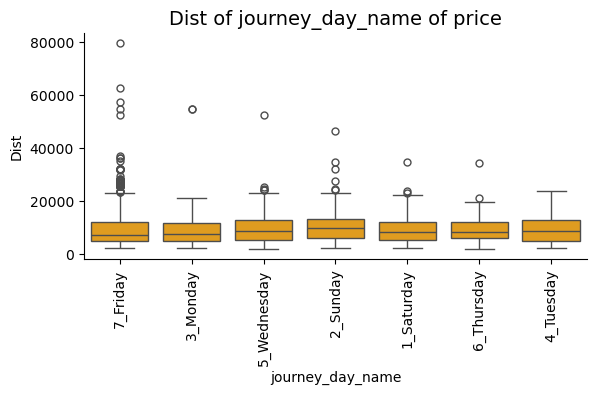

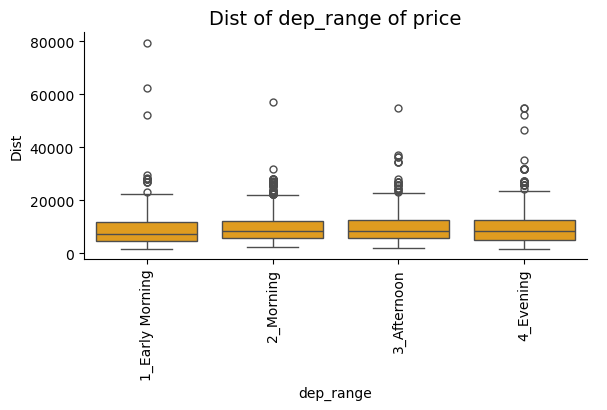

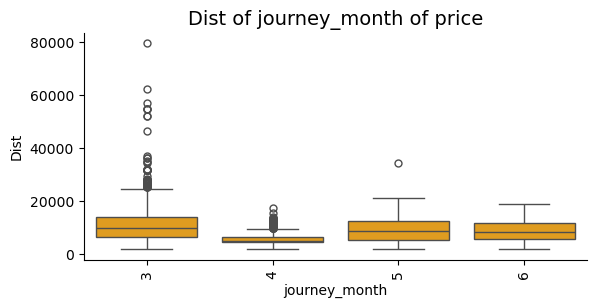

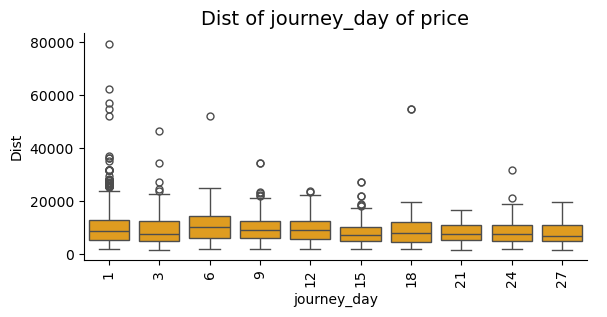

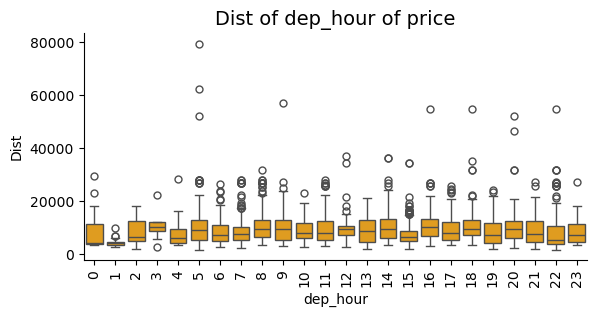

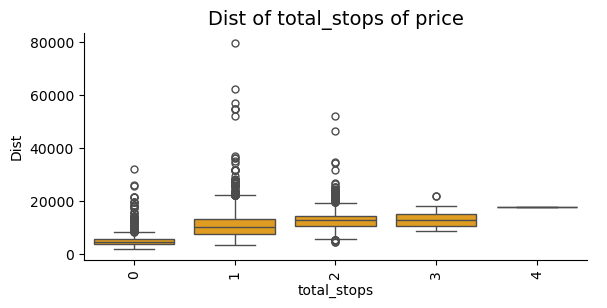

In [48]:
# Num Boxplot
for x in cat:
    sns.catplot(y = 'price', x = x, data = df.sort_values('price', ascending = False), kind='box', height = 3, aspect = 2, orient='v' , color= 'orange' )
    plt.title(f'Dist of {x} of price', fontsize=14)
    plt.xlabel(x)
    plt.ylabel('Dist')
    plt.xticks(rotation=90)
    plt.show()


#### ✔️ Handeling Outliers

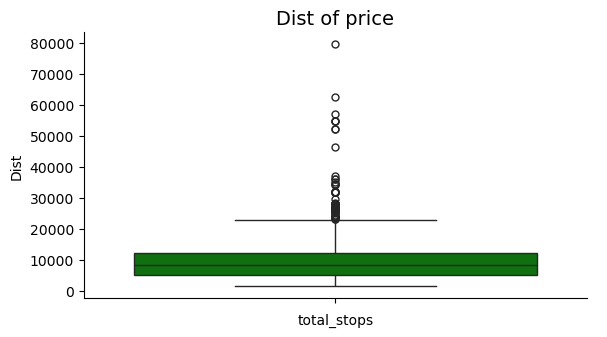

In [49]:
sns.catplot(y = df['price'], kind='box', height = 3, aspect = 2, orient='v' , color= 'green' )
plt.title(f'Dist of price', fontsize=14)
plt.xlabel(x)
plt.ylabel('Dist')
plt.xticks(rotation=90)
plt.show()

In [50]:
df[df.price < 3000]

airline date_of_journey  source destination  duration  total_stops  \
228     SpiceJet      2019-05-21  Mumbai   Hyderabad        61            0   
275       IndiGo      2019-03-15  Mumbai   Hyderabad        61            0   
276    Air India      2019-03-27  Mumbai   Hyderabad        61            0   
300       IndiGo      2019-05-03  Mumbai   Hyderabad        61            0   
374       IndiGo      2019-06-03  Mumbai   Hyderabad        61            0   
...          ...             ...     ...         ...       ...          ...   
10513   SpiceJet      2019-03-27  Mumbai   Hyderabad        61            0   
10523     IndiGo      2019-05-09  Mumbai   Hyderabad        61            0   
10588     IndiGo      2019-05-27  Mumbai   Hyderabad        61            0   
10609     IndiGo      2019-05-12  Mumbai   Hyderabad        61            0   
10617     IndiGo      2019-05-27  Mumbai   Hyderabad        61            0   

       price  journey_month  journey_day journey_day_name  dep_hour  \
228     1965              5           21        4_Tuesday         5   
275     2754              3           15         7_Friday        21   
276     2575              3           27      5_Wednesday         6   
300     2754              5            3         7_Friday         2   
374     2754              6            3         3_Monday        19   
...      ...            ...          ...              ...       ...   
10513   1759              3           27      5_Wednesday         5   
10523   2437              5            9       6_Thursday        20   
10588   2227              5           27         3_Monday        20   
10609   2754              5           12         2_Sunday        12   
10617   2754              5           27         3_Monday         2   

             dep_range  
228    1_Early Morning  
275          4_Evening  
276          2_Morning  
300    1_Early Morning  
374          4_Evening  
...                ...  
10513  1_Early Morning  
10523        4_Evening  
10588        4_Evening  
10609      3_Afternoon  
10617  1_Early Morning  

[247 rows x 12 columns]

In [51]:
# Overview Price for a case to see the diffrent on the same data
df[(df['airline'] == 'IndiGo') & (df['source'] == 'Banglore') & (df['destination'] == 'New Delhi') & 
(df['duration'] == 122) & (df['date_of_journey'] == '2019-03-24	')].sort_values(by = [ 'dep_range' , 'price' ])

airline date_of_journey    source destination  duration  total_stops  \
5950   IndiGo      2019-03-24  Banglore   New Delhi       122            0   
7496   IndiGo      2019-03-24  Banglore   New Delhi       122            0   
161    IndiGo      2019-03-24  Banglore   New Delhi       122            0   
2044   IndiGo      2019-03-24  Banglore   New Delhi       122            0   
9178   IndiGo      2019-03-24  Banglore   New Delhi       122            0   
6936   IndiGo      2019-03-24  Banglore   New Delhi       122            0   
1826   IndiGo      2019-03-24  Banglore   New Delhi       122            0   
4794   IndiGo      2019-03-24  Banglore   New Delhi       122            0   
7963   IndiGo      2019-03-24  Banglore   New Delhi       122            0   
6100   IndiGo      2019-03-24  Banglore   New Delhi       122            0   
4949   IndiGo      2019-03-24  Banglore   New Delhi       122            0   
6842   IndiGo      2019-03-24  Banglore   New Delhi       122            0   
7460   IndiGo      2019-03-24  Banglore   New Delhi       122            0   
7683   IndiGo      2019-03-24  Banglore   New Delhi       122            0   
7004   IndiGo      2019-03-24  Banglore   New Delhi       122            0   
0      IndiGo      2019-03-24  Banglore   New Delhi       122            0   
52     IndiGo      2019-03-24  Banglore   New Delhi       122            0   
9844   IndiGo      2019-03-24  Banglore   New Delhi       122            0   
5803   IndiGo      2019-03-24  Banglore   New Delhi       122            0   
857    IndiGo      2019-03-24  Banglore   New Delhi       122            0   
8371   IndiGo      2019-03-24  Banglore   New Delhi       122            0   
4688   IndiGo      2019-03-24  Banglore   New Delhi       122            0   
6554   IndiGo      2019-03-24  Banglore   New Delhi       122            0   
3409   IndiGo      2019-03-24  Banglore   New Delhi       122            0   
328    IndiGo      2019-03-24  Banglore   New Delhi       122            0   
1016   IndiGo      2019-03-24  Banglore   New Delhi       122            0   
10162  IndiGo      2019-03-24  Banglore   New Delhi       122            0   
6027   IndiGo      2019-03-24  Banglore   New Delhi       122            0   

       price  journey_month  journey_day journey_day_name  dep_hour  \
5950    4238              3           24         2_Sunday         0   
7496    4238              3           24         2_Sunday         1   
161     4777              3           24         2_Sunday         0   
2044    4777              3           24         2_Sunday         4   
9178    4777              3           24         2_Sunday         1   
6936    5694              3           24         2_Sunday         4   
1826    4777              3           24         2_Sunday         6   
4794    4777              3           24         2_Sunday        10   
7963    5734              3           24         2_Sunday        10   
6100    6144              3           24         2_Sunday         7   
4949    6860              3           24         2_Sunday         7   
6842   10067              3           24         2_Sunday        10   
7460    5694              3           24         2_Sunday        13   
7683    7303              3           24         2_Sunday        16   
7004    8033              3           24         2_Sunday        13   
0       3897              3           24         2_Sunday        22   
52      4377              3           24         2_Sunday        22   
9844    4777              3           24         2_Sunday        21   
5803    4944              3           24         2_Sunday        23   
857     5694              3           24         2_Sunday        21   
8371    5694              3           24         2_Sunday        23   
4688    6144              3           24         2_Sunday        21   
6554    6144              3           24         2_Sunday        20   
3409    6860              3           2

In [52]:
df.price.describe()

count   10462.00
mean     9026.79
std      4624.85
min      1759.00
25%      5224.00
50%      8266.00
75%     12344.75
max     79512.00
Name: price, dtype: float64

In [53]:
print( round((df[df.price < 3000].shape[0] / df.shape[0])*100 , 3) , '%')

2.361 %


In [54]:
print( round((df[df.price < df.price.median()].shape[0] / df.shape[0])*100 , 3) , '%')

49.885 %


In [55]:
# Remove outliers
drop_index = df[df.price < 3000].index
df.drop(drop_index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

airline date_of_journey    source destination  duration  \
0           IndiGo      2019-03-24  Banglore   New Delhi       122   
1        Air India      2019-05-01   Kolkata    Banglore       427   
2      Jet Airways      2019-06-09     Delhi      Cochin        19   
3           IndiGo      2019-05-12   Kolkata    Banglore       305   
4           IndiGo      2019-03-01  Banglore   New Delhi       244   
...            ...             ...       ...         ...       ...   
10210     Air Asia      2019-04-09   Kolkata    Banglore       122   
10211    Air India      2019-04-27   Kolkata    Banglore       122   
10212  Jet Airways      2019-04-27  Banglore       Delhi         3   
10213      Vistara      2019-03-01  Banglore   New Delhi       122   
10214    Air India      2019-05-09     Delhi      Cochin       488   

       total_stops  price  journey_month  journey_day journey_day_name  \
0                0   3897              3           24         2_Sunday   
1                2   7662              5            1      5_Wednesday   
2                2  13882              6            9         2_Sunday   
3                1   6218              5           12         2_Sunday   
4                1  13302              3            1         7_Friday   
...            ...    ...            ...          ...              ...   
10210            0   4107              4            9        4_Tuesday   
10211            0   4145              4           27       1_Saturday   
10212            0   7229              4           27       1_Saturday   
10213            0  12648              3            1         7_Friday   
10214            2  11753              5            9       6_Thursday   

       dep_hour        dep_range  
0            22        4_Evening  
1             5  1_Early Morning  
2             9        2_Morning  
3            18        4_Evening  
4            16      3_Afternoon  
...         ...              ...  
10210        19        4_Evening  
10211        20        4_Evening  
10212         8        2_Morning  
10213        11        2_Morning  
10214        10        2_Morning  

[10215 rows x 12 columns]

## 5) Multivaria Analysis

In [56]:
df.head(1)

airline date_of_journey    source destination  duration  total_stops  price  \
0  IndiGo      2019-03-24  Banglore   New Delhi       122            0   3897   

   journey_month  journey_day journey_day_name  dep_hour  dep_range  
0              3           24         2_Sunday        22  4_Evening

In [57]:
# Define Function for Crosstab visualization 
def HeatMapp(data , title , xlabel , ylabel , color):
    plt.figure(figsize=(15, 9))
    sns.heatmap( data , annot=True, fmt='g', cmap=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return plt.show()

#### ✔️ AVG Price per airline vs dep_range

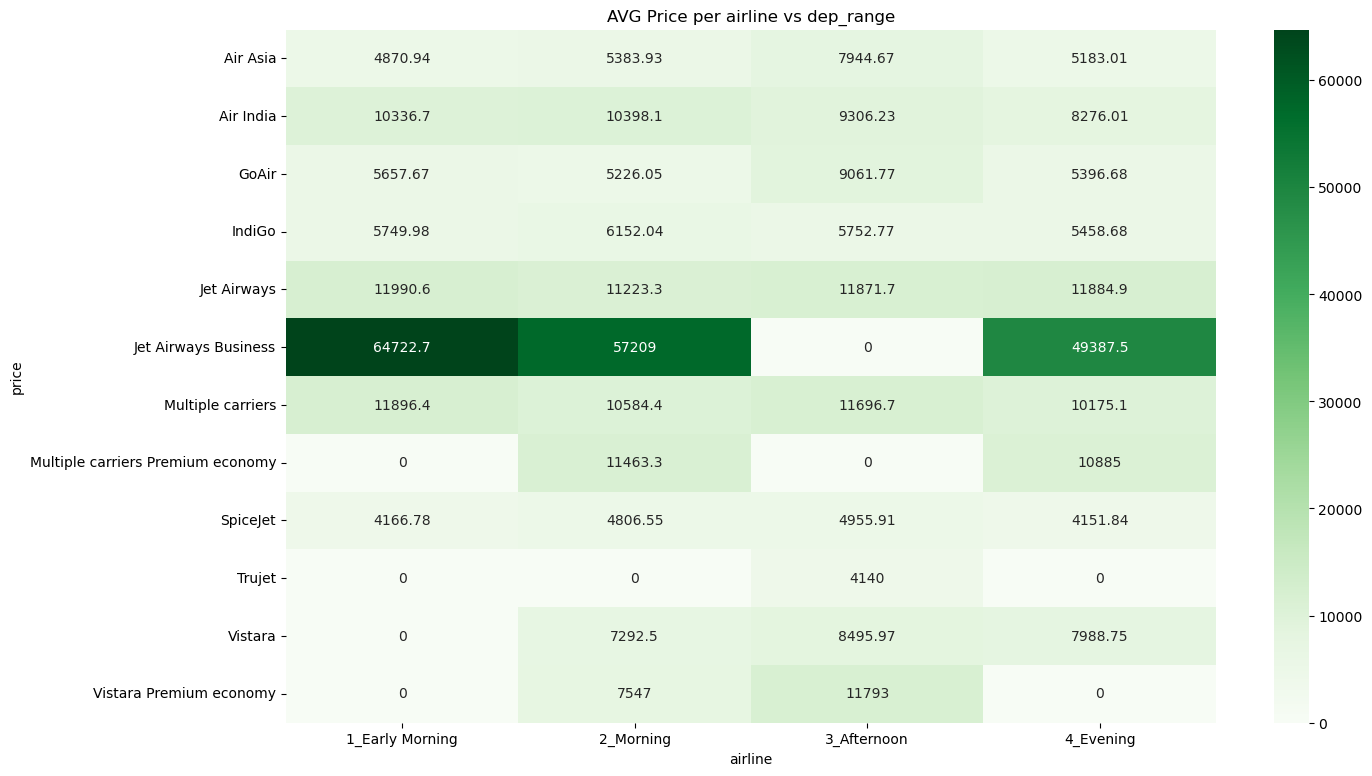

In [58]:
CrossMSK = pd.crosstab (index = df['airline'] , columns = df['dep_range'] , values = df['price'] , aggfunc='mean' ).fillna(0)
HeatMapp(CrossMSK , 'AVG Price per airline vs dep_range' , 'airline' , 'price' , 'Greens')

#### ✔️ AVG Price per airline vs Month

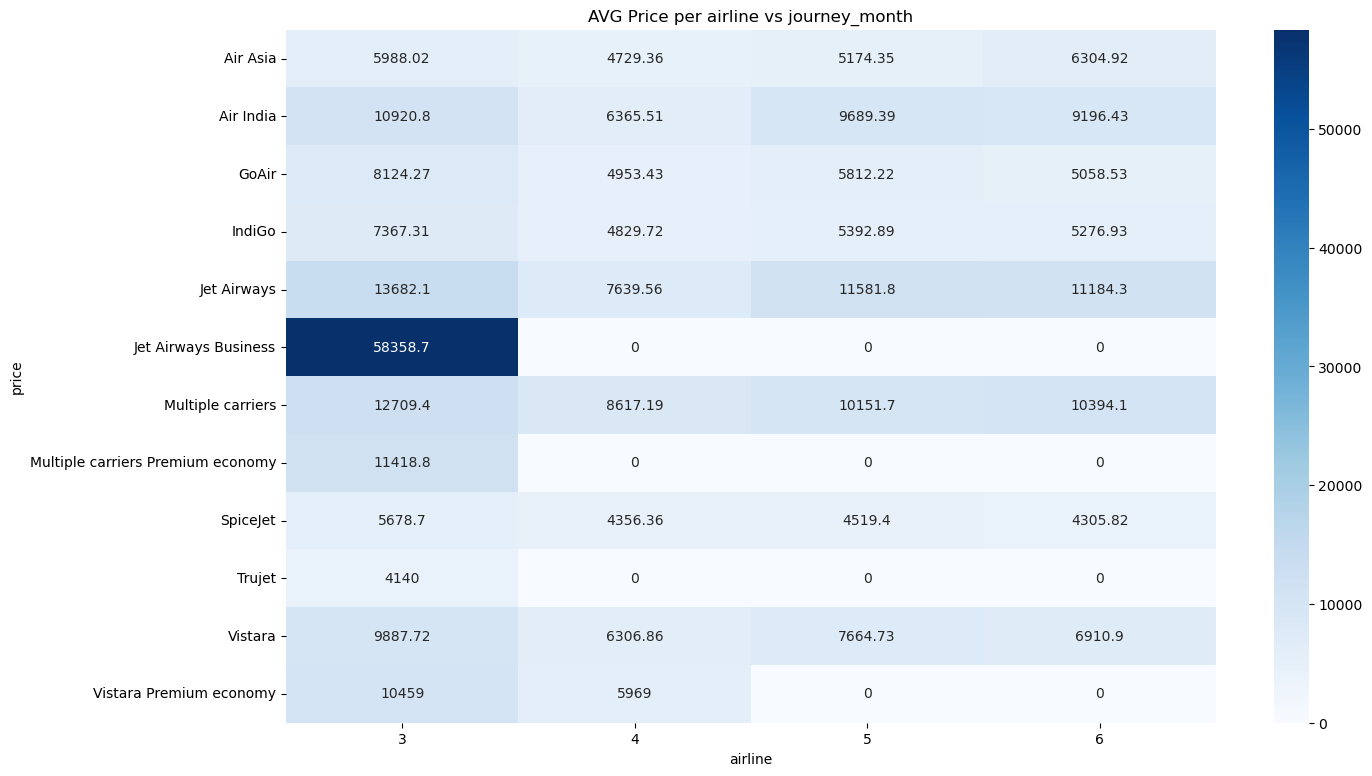

In [61]:
CrossMSK = pd.crosstab (index = df['airline'] , columns = df['journey_month'] , values = df['price'] , aggfunc='mean' ).fillna(0)
HeatMapp(CrossMSK , 'AVG Price per airline vs journey_month' , 'airline' , 'price' , 'Blues')

#### ✔️ AVG Price per airline vs Day

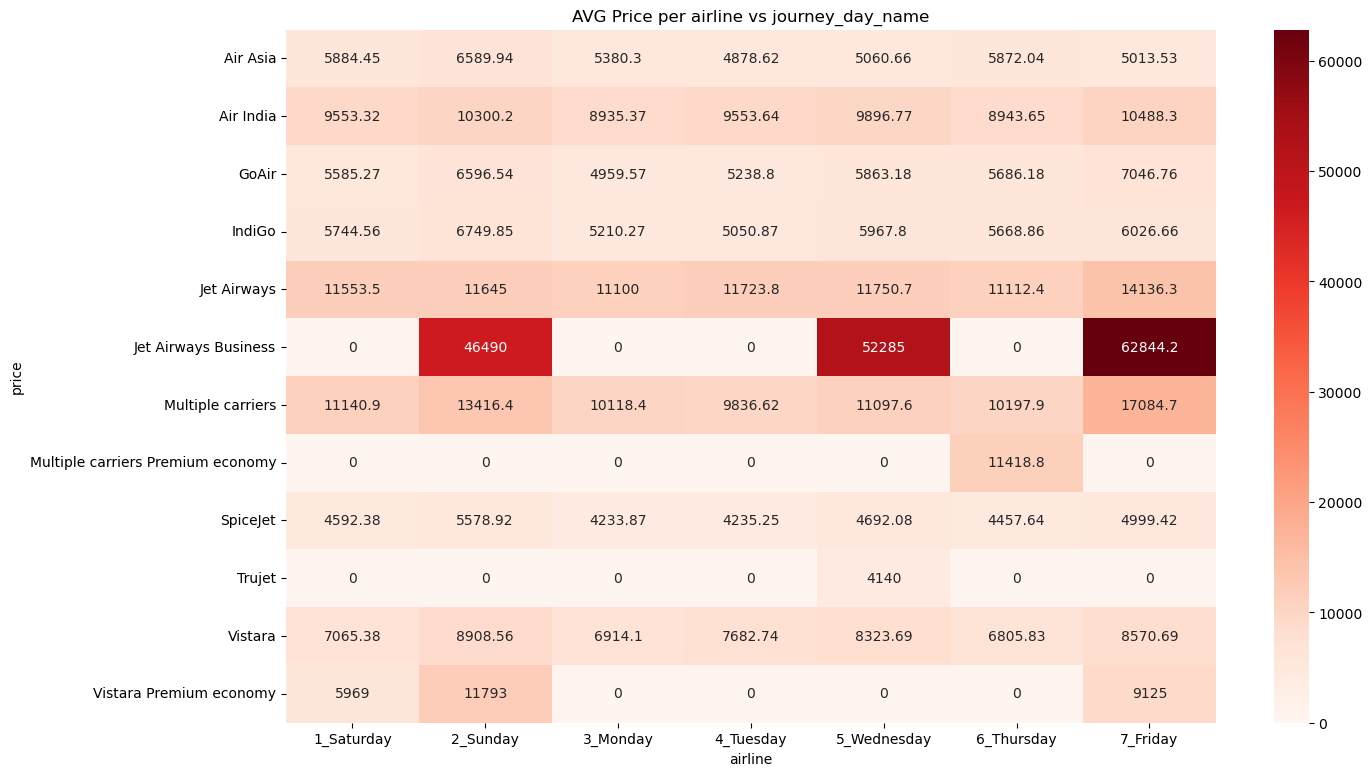

In [63]:
CrossMSK = pd.crosstab (index = df['airline'] , columns = df['journey_day_name'] , values = df['price'] , aggfunc='mean' ).fillna(0)
HeatMapp(CrossMSK , 'AVG Price per airline vs journey_day_name' , 'airline' , 'price' , 'Reds')

#### ✔️ AVG Price per airline vs total_stops

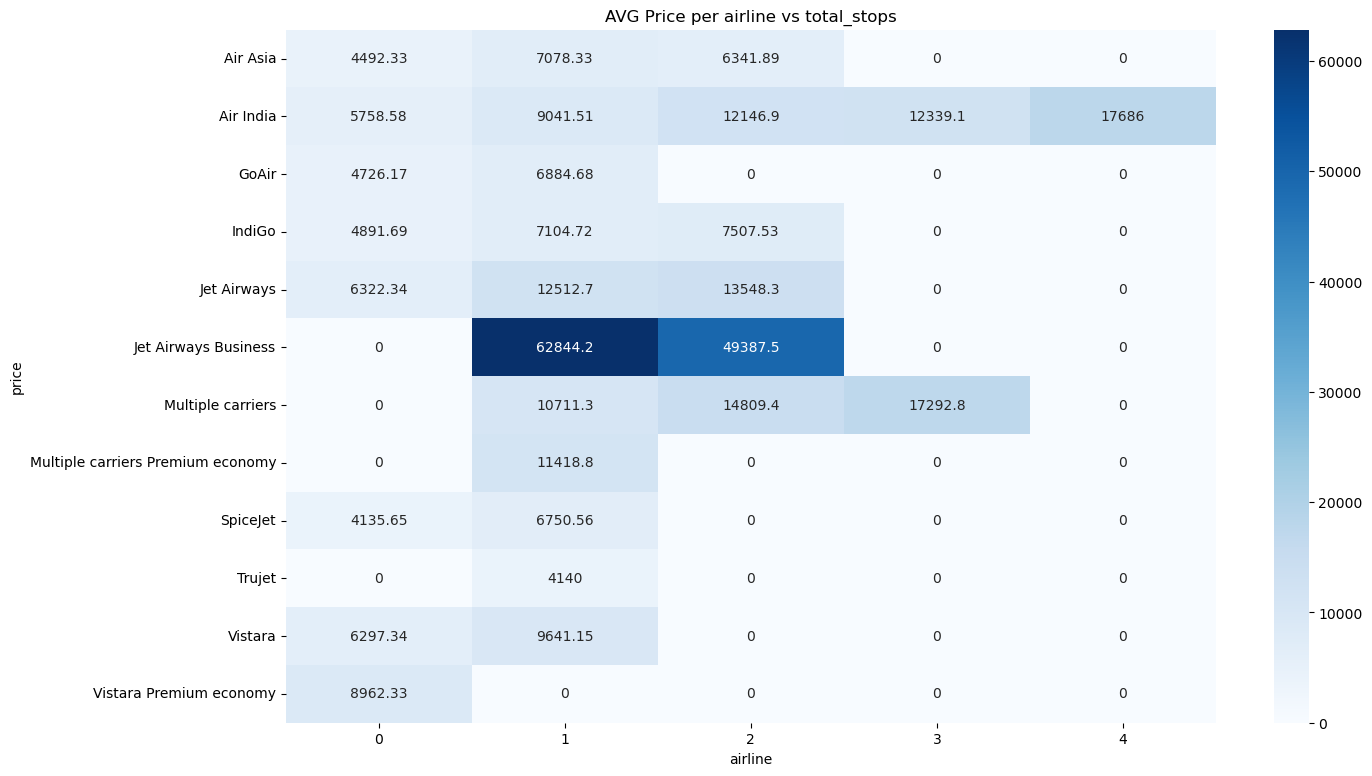

In [66]:
CrossMSK = pd.crosstab (index = df['airline'] , columns = df['total_stops'] , values = df['price'] , aggfunc='mean' ).fillna(0)
HeatMapp(CrossMSK , 'AVG Price per airline vs total_stops' , 'airline' , 'price' , 'Blues')

#### ✔️ "date_of_journey" per "duration" for "price"

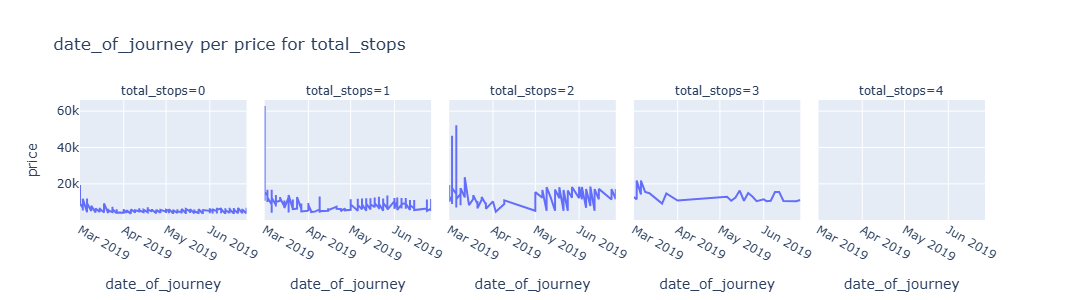

In [85]:
msk = df.groupby([ 'date_of_journey' , 'airline' , 'total_stops']).agg({"price":"mean" , "duration":"mean"}).sort_index().reset_index()
px.line(msk , x = 'date_of_journey' , y = 'price' , facet_col= 'total_stops' , width=1100 , height=300 , title= 'date_of_journey per price for total_stops')

#### ✔️ "date_of_journey" per "duration" for "total_stops"

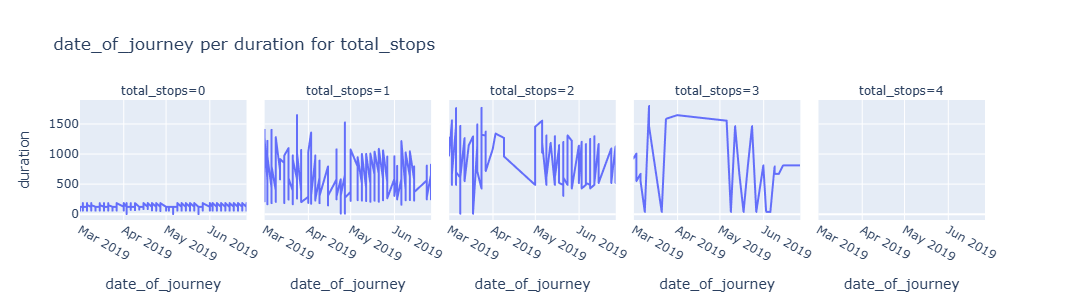

In [84]:
px.line(msk , x = 'date_of_journey' , y = 'duration' , facet_col= 'total_stops' , width=1100 , height=300 , title= 'date_of_journey per duration for total_stops')

#### ✔️ "price" per "airline" for "total_stops"

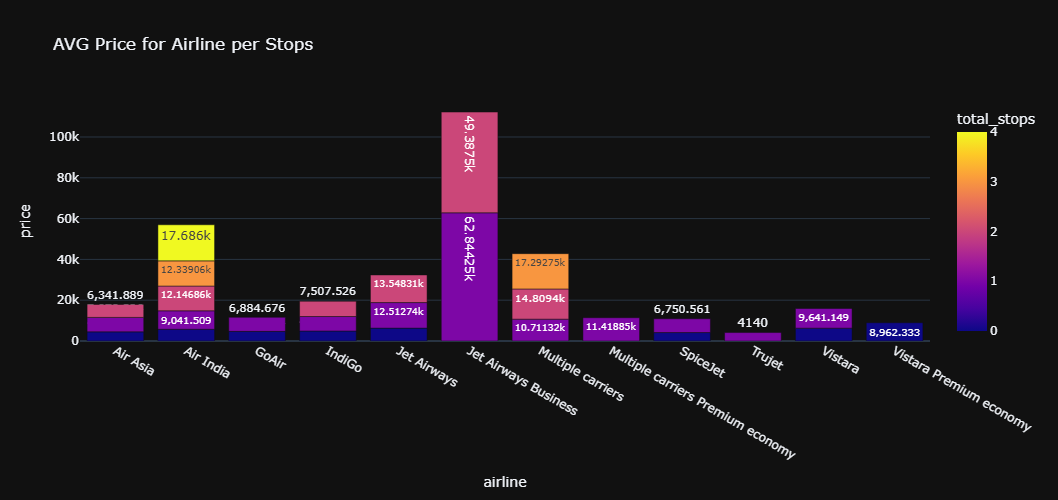

In [98]:
msk = df.groupby(['airline' , 'total_stops'])['price'].mean().reset_index()
px.bar(msk , x='airline' , y='price' , color= 'total_stops' , text_auto=True , width=1000 , height=500 , barmode='group' , title='AVG Price for Airline per Stops'  , template = 'plotly_dark')

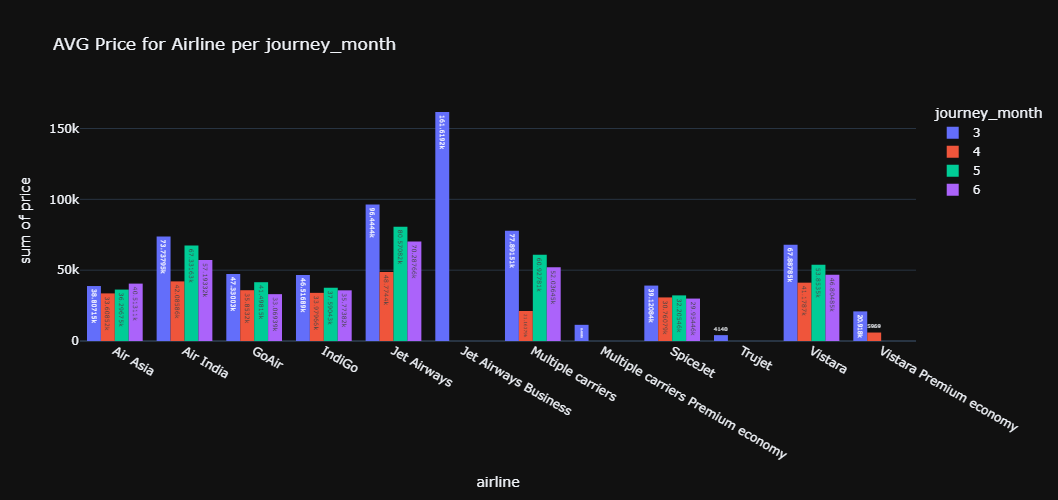

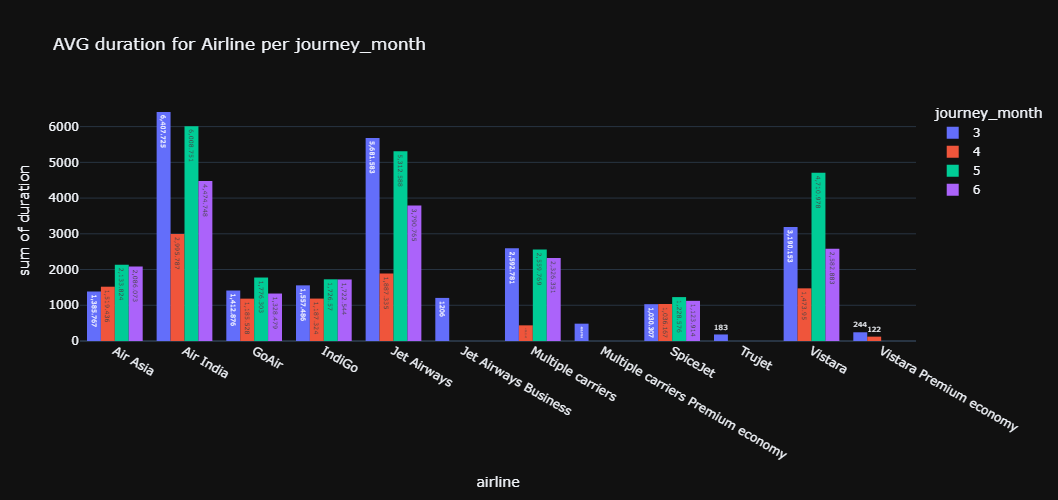

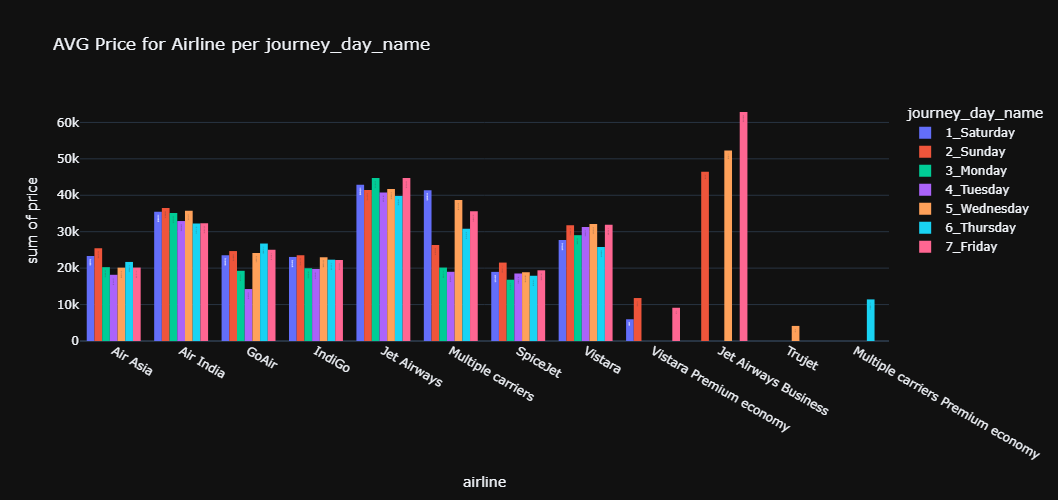

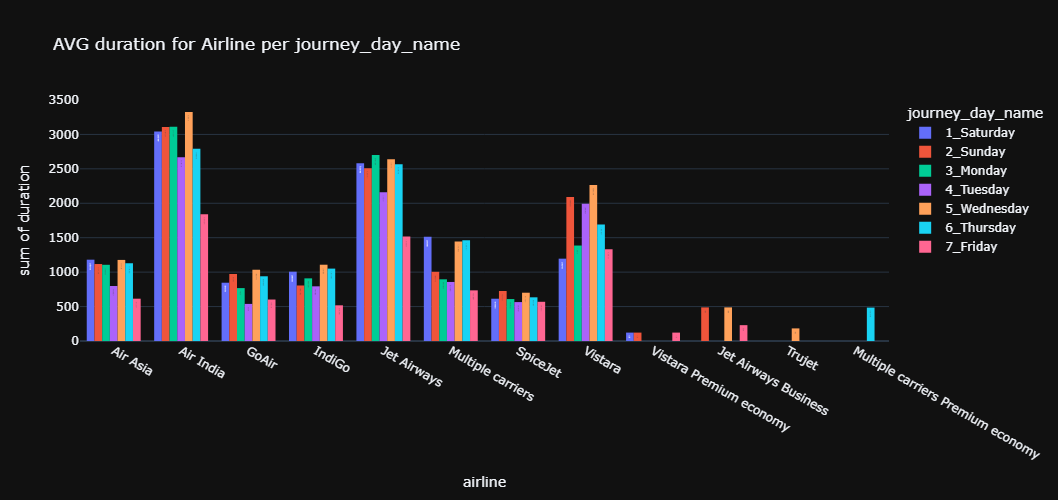

In [104]:
msk = df.groupby([ 'airline' , 'journey_month' , 'journey_day_name']).agg({"price":"mean" , "duration":"mean"}).sort_index().reset_index()
px.histogram(msk,x='airline',y='price',color='journey_month',
       text_auto=True,width=1000,height=500,barmode='group',title='AVG Price for Airline per journey_month',template='plotly_dark').show()
print('')

px.histogram(msk,x='airline',y='duration',color='journey_month',
       text_auto=True,width=1000,height=500,barmode='group',title='AVG duration for Airline per journey_month',template='plotly_dark').show()
print('')

px.histogram(msk,x='airline',y='price',color='journey_day_name',
       text_auto=True,width=1000,height=500,barmode='group',title='AVG Price for Airline per journey_day_name',template='plotly_dark').show()
print('')

px.histogram(msk,x='airline',y='duration',color='journey_day_name',
       text_auto=True,width=1000,height=500,barmode='group',title='AVG duration for Airline per journey_day_name',template='plotly_dark').show()
print('')

In [100]:
df.head(1)

airline date_of_journey    source destination  duration  total_stops  price  \
0  IndiGo      2019-03-24  Banglore   New Delhi       122            0   3897   

   journey_month  journey_day journey_day_name  dep_hour  dep_range  
0              3           24         2_Sunday        22  4_Evening

## 6) Modeling 1

#### ✔️ Preprocessing

In [120]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder , RobustScaler , StandardScaler , OrdinalEncoder , PolynomialFeatures
from category_encoders.binary import BinaryEncoder

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error , r2_score

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [219]:
drop_col = ['price' , 'date_of_journey','dep_range']
categorical = ['airline' , 'source' , 'destination','journey_day_name']
ordinal = ['journey_month','journey_day','dep_hour']
numerical = ['duration','total_stops']
Final_DF = df.drop(['date_of_journey','dep_range'] , axis=1)
Final_DF.to_csv('new_df.csv')

In [308]:
Col_Trans = ColumnTransformer( transformers = [ ("OrdinalEncoder" , OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) , ordinal )  ,
                                                ("BinaryEncoder" , BinaryEncoder() , categorical ) , 
                                                ("RobustScaler", RobustScaler() ,  numerical)] , remainder="passthrough")

steps = []
steps.append(("Col_Trans" , Col_Trans))
steps.append(("Model" , RandomForestRegressor()))
pipeline = Pipeline(steps = steps)

x = df.drop(drop_col , axis = 1 )
y = df["price"]

result = cross_validate(pipeline , x ,y , cv = 5 , scoring="r2" , return_train_score=True)
result

{'fit_time': array([4.17732644, 3.89691329, 3.85896945, 4.12073112, 3.8143394 ]),
 'score_time': array([0.10924029, 0.12500191, 0.11606526, 0.10937738, 0.13384676]),
 'test_score': array([0.75450583, 0.79094868, 0.80153618, 0.75235298, 0.75701368]),
 'train_score': array([0.94043902, 0.94206696, 0.94043992, 0.94357329, 0.94327454])}

In [173]:
pipeline

Pipeline(steps=[('Col_Trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OrdinalEncoder',
                                                  OrdinalEncoder(),
                                                  ['journey_month',
                                                   'journey_day', 'dep_hour']),
                                                 ('BinaryEncoder',
                                                  BinaryEncoder(),
                                                  ['airline', 'source',
                                                   'destination',
                                                   'journey_day_name']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['duration',
                                                   'total_stops'])])),
                ('LR', AdaBoostRegressor())])

In [309]:
models = [
    ("LR", LinearRegression()),
    ("RF", RandomForestRegressor()),
    ("Ada", AdaBoostRegressor()),
    ("DT", DecisionTreeRegressor()),
    ("XGB", XGBRegressor(max_depth= 20, max_leaves= 50, n_estimators = 80))]

In [310]:
for model in models:
    steps = []
    steps.append(("Col_Trans" , Col_Trans))
    steps.append(model)
    pipeline = Pipeline(steps = steps)
    result = cross_validate(pipeline , x ,y , cv = 5 , scoring="r2" , return_train_score=True)
    print(f"{model[0]} : Average Train accuracy is {result['train_score'].mean() }")
    print(f"{model[0]} : Average Test accuracy is {result['test_score'].mean() } \n")

LR : Average Train accuracy is 0.5169426229553572
LR : Average Test accuracy is 0.5173825029084685 

RF : Average Train accuracy is 0.9419473981621701
RF : Average Test accuracy is 0.770238927238358 

Ada : Average Train accuracy is 0.4000878605606052
Ada : Average Test accuracy is 0.3722691058892312 

DT : Average Train accuracy is 0.960253128948564
DT : Average Test accuracy is 0.6373828492593162 

XGB : Average Train accuracy is 0.8992955327033997
XGB : Average Test accuracy is 0.8106173515319824 



In [314]:
from sklearn.model_selection import GridSearchCV

steps = []
steps.append(("Col_Trans" , Col_Trans))
steps.append(("Model" , XGBRegressor()))
pipeline = Pipeline(steps = steps)

params = {
        "Model__n_estimators" : [50 , 100] , 
        "Model__max_depth" : [50 , 100 ] ,
        "Model__max_leaves" : [50 , 100] }

grid = GridSearchCV(estimator=pipeline , cv = 5 , scoring = "r2" , param_grid=params , return_train_score=True , n_jobs=-1)

result = grid.fit(x,y)

print("mean_train_score : " , result.cv_results_["mean_train_score"])
print("mean_test_score : " , result.cv_results_["mean_test_score"],"\n")
print("mean_train_score : " , result.cv_results_["mean_train_score"][result.best_index_])
print("mean_test_score : " , result.cv_results_["mean_test_score"][result.best_index_],"\n")
print("best_params : " , result.best_params_)

mean_train_score :  [0.88294694 0.90732524 0.91112708 0.93326303 0.88294694 0.90732524
 0.91112708 0.93326303]
mean_test_score :  [0.81083803 0.80861332 0.81117507 0.80015317 0.81083803 0.80861332
 0.81117507 0.80015317] 

mean_train_score :  0.9111270785331727
mean_test_score :  0.8111750721931458 

best_params :  {'Model__max_depth': 50, 'Model__max_leaves': 100, 'Model__n_estimators': 50}


In [316]:
Final_Model = result.best_estimator_
Final_Model.fit(x,y)

Pipeline(steps=[('Col_Trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OrdinalEncoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['journey_month',
                                                   'journey_day', 'dep_hour']),
                                                 ('BinaryEncoder',
                                                  BinaryEncoder(),
                                                  ['airline', 'source',
                                                   'destination',
                                                   'journey_day_name']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['duration',
                                                   'tot...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=50, max_leaves=100,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=50, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

#### ✔️ Deployment

In [318]:
# Process Save
import pickle
pickle.dump(Final_Model, open('model_2.pkl', 'wb'))

# Load
pickle.load(open('model_2.pkl', 'rb'))

Pipeline(steps=[('Col_Trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OrdinalEncoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['journey_month',
                                                   'journey_day', 'dep_hour']),
                                                 ('BinaryEncoder',
                                                  BinaryEncoder(),
                                                  ['airline', 'source',
                                                   'destination',
                                                   'journey_day_name']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['duration',
                                                   'tot...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=50, max_leaves=100,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=50, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [326]:
# Save data
data = {
    "airline":df.airline.unique().tolist(),
    "source":df.source.unique().tolist(),
    "destination":df.destination.unique().tolist(),
    "duration":list(range(0,100000,1)),
    "total_stops":list(range(0,5,1)),
    "journey_month":list(range(1,12,1)),
    "journey_day":list(range(1,31,1)),
    "journey_day_name":df.journey_day_name.unique().tolist(),
    "dep_hour":list(range(1,24,1))  }

pickle.dump(data, open('Deployment_data_1.pkl', 'wb'))

In [331]:
%%writefile app_1.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OrdinalEncoder , PolynomialFeatures ,RobustScaler
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error , r2_score
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import plotly.express as px
pd.options.display.float_format = '{:,.2f}'.format

df_new = pd.read_csv('new_df.csv',index_col=0)
pd.options.display.float_format ='{:,.2f}'.format
st.set_page_config (page_title = 'Flight Fare' , layout = "wide" , page_icon = '📊')
st.title("Flight Fare")


Prediction  = st.tabs(['Prediction 📈'])

with Prediction[0]:
    # Load data
    data = pickle.load(open('Deployment_data_1.pkl', 'rb'))
    
    # Input Data
    with st.container():
        st.subheader("📈 Prediction")
        P_col_0, P_col_1,P_col_2  = st.columns([10,10,10])
        with P_col_0:
            airline	= st.selectbox("Select airline", ["Select"] + df_new.airline.unique().tolist())
            source = st.selectbox("Select source", ["Select"] + df_new.source.unique().tolist())
            journey_day_name = st.selectbox("Select journey_day_name", ["Select"] + df_new.journey_day_name.unique().tolist())
        with P_col_1:
            destination	= st.selectbox("Select destination", ["Select"] + df_new.source.unique().tolist())
            journey_month = int(st.number_input("journey_month", 1, 12))
            journey_day	= int(st.number_input("journey_day", 1, 31))
        with P_col_2:
            dep_hour = int(st.number_input("dep_hour", 0, 24))
            total_stops	= int(st.number_input("total_stops", 0, 5))
            duration	= int(st.number_input("duration", 1, 100000))

    with st.container():
        # New Data
        col1, col2, col3 = st.columns([40,2,10])
        with col1:
            N_data = pd.DataFrame({
                "airline":[airline],
                "source":[source],
                "destination":[destination],
                "duration":[duration],
                "total_stops":[total_stops],
                "journey_month":[journey_month],
                "journey_day":[journey_day],
                "journey_day_name":[journey_day_name],
                "dep_hour":[dep_hour] } ,  index=[0])


            # # Predict
            Predict = pickle.load(open('model_2.pkl', 'rb'))
            result = Predict.predict(N_data)
            st.write(N_data)
        with col3:
            # # Output
            if st.button("Predict"):
                st.header(f"Price: {int(result)}")
                st.balloons()

Overwriting app_1.py


In [324]:
!streamlit run app_1.py

^C


In [333]:
!pipreqs

INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in D:\Data Science (Material)\01-Epslion\04-Internship (Karim Hamdy)\Projects\03 - ML- Flight-Fare -Regrission\requirements.txt
